EJERCICIO INTEGRADOR: SPOTIFY 2019 - ANÁLISIS COMPLETO

1. CARGANDO DATOS DESDE API...
Datos cargados exitosamente desde la API

2. MANIPULACIÓN DE DATAFRAMES
----------------------------------------
Estructura inicial del DataFrame:
Dimensiones: (32833, 23)
Columnas: ['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

 Primeras 5 filas:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7               

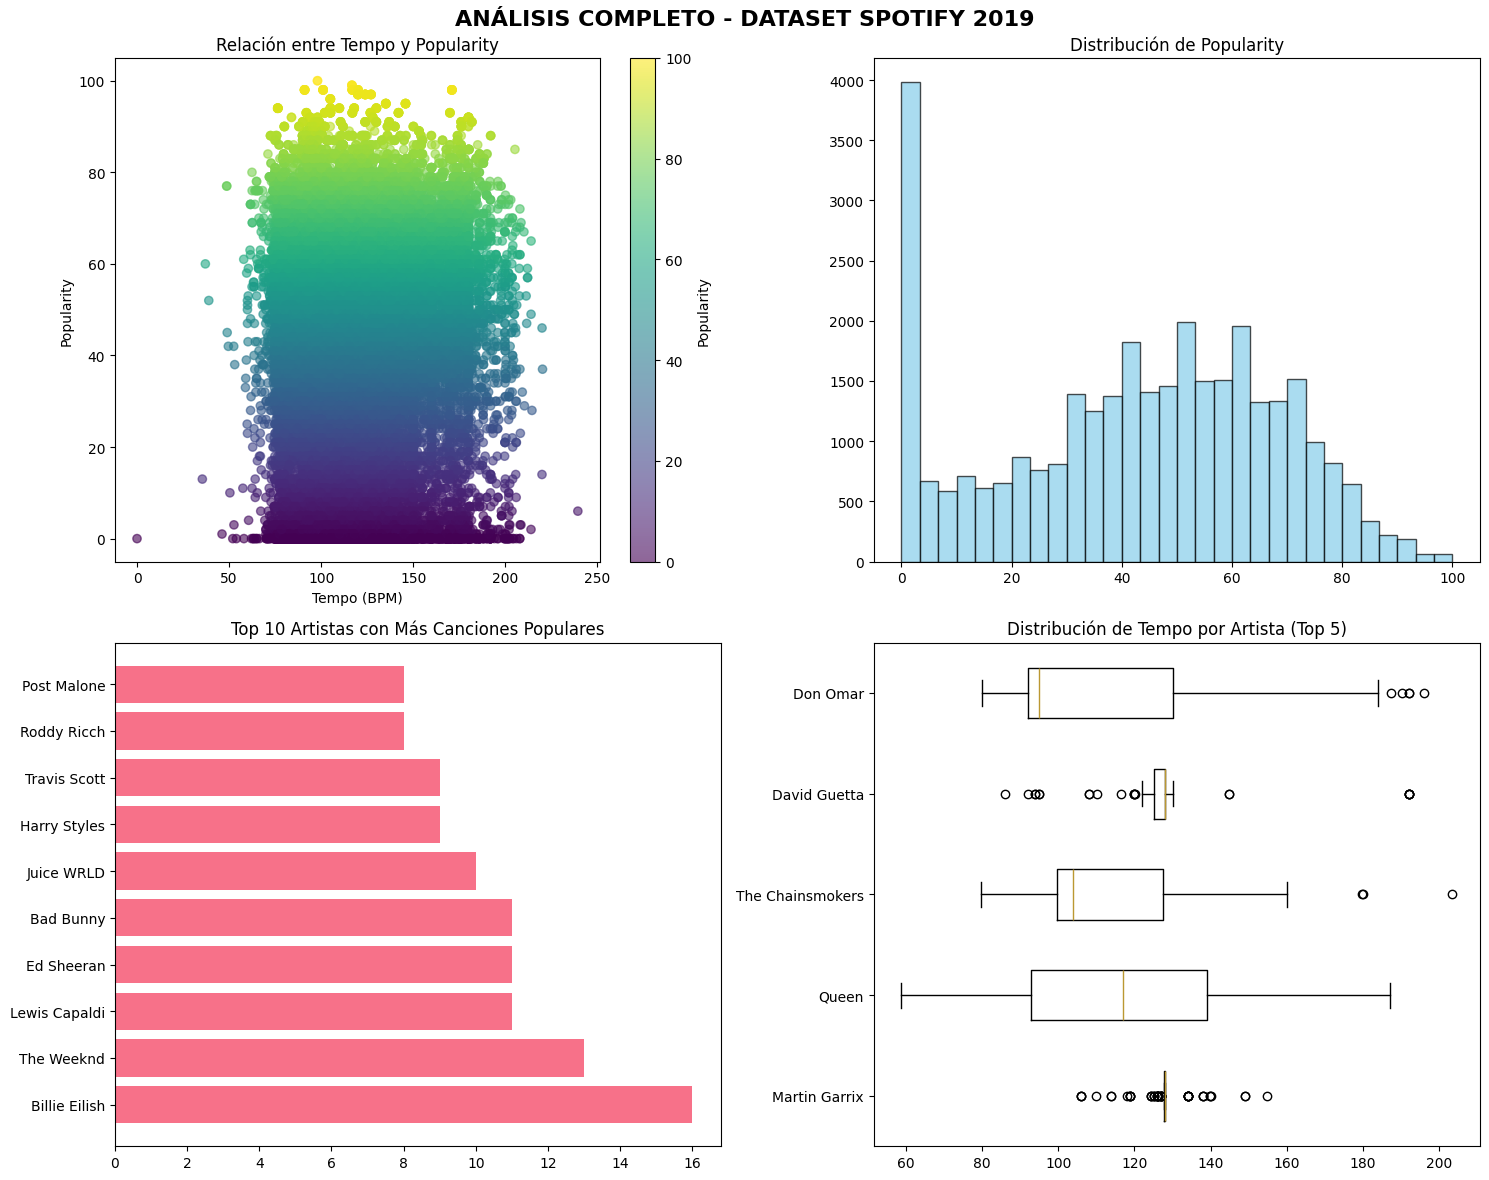


6. ANÁLISIS DE CORRELACIÓN
----------------------------------------
 Matriz de Correlación:
              tempo  popularity  danceability  energy  loudness
tempo         1.000      -0.005        -0.184   0.150     0.094
popularity   -0.005       1.000         0.065  -0.109     0.058
danceability -0.184       0.065         1.000  -0.086     0.025
energy        0.150      -0.109        -0.086   1.000     0.677
loudness      0.094       0.058         0.025   0.677     1.000

 Correlación entre Tempo y Popularity: -0.005

7. ANÁLISIS INTEGRADOR: MÚSICA Y RENDIMIENTO
----------------------------------------

TOP 5 CANCIONES RECOMENDADAS PARA ESTUDIAR:
              artista                                    track_name  \
20021  Spanish F.L.Y.  Dope's Gotta Hold On Me (feat. Ese Rich Roc)   
27095          Swardy                                          Down   
25290           Dwele                            I Think I Love You   
19581        Kevin G.                                       

In [1]:
# EJERCICIO INTEGRADOR: SPOTIFY Y RENDIMIENTO ACADÉMICO

import pandas as pd       
import numpy as np       
import matplotlib.pyplot as plt  
import seaborn as sns     # Visualizaciones avanzadas
import requests           # Para leer datos desde internet (API / URL)
from io import StringIO   # Convierte texto descargado en un "archivo virtual"
import warnings           # Manejo de advertencias


warnings.filterwarnings('ignore')    
plt.style.use('default')             
sns.set_palette("husl")              

print("=" * 60)
print("EJERCICIO INTEGRADOR: SPOTIFY 2019 - ANÁLISIS COMPLETO")
print("=" * 60)

# PARTE 1: CARGA DE DATOS DESDE API

def cargar_datos_desde_api():
    """
    Descarga el dataset de Spotify desde una URL pública.
    Si falla, intenta cargarlo desde un archivo local.
    """
    print("\n1. CARGANDO DATOS DESDE API...")
    
    url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
    
    try:
        # requests.get() hace una solicitud HTTP GET al servidor
        response = requests.get(url)
        # raise_for_status() lanza un error si la respuesta no es 200 (OK)
        response.raise_for_status()
        
        # StringIO permite tratar el texto descargado como si fuera un archivo
        df = pd.read_csv(StringIO(response.text))
        print("Datos cargados exitosamente desde la API")
        return df
    
    except requests.exceptions.RequestException as e:
        # Si ocurre un error (no hay internet, falla la URL, etc.)
        print(f"Error al descargar datos: {e}")
        print("Intentando cargar datos locales...")
        
        try:
            df = pd.read_csv('spotify_songs.csv')
            print("Datos cargados desde archivo local")
            return df
        except FileNotFoundError:
            # Si tampoco hay archivo local, no se puede continuar
            print("No se pudo cargar ningún dataset")
            return None

# Llamamos a la función para cargar datos
df_spotify = cargar_datos_desde_api()

# Si no se pudo cargar, creamos un dataset ficticio para continuar el análisis
if df_spotify is None:
    print("Creando dataset de ejemplo...")
    np.random.seed(42)  
    n = 1000           
    data = {
        'track_artist': np.random.choice(['Bad Bunny', 'Billie Eilish', 'Ed Sheeran', 'Taylor Swift', 'The Weeknd'], n),  # Artista aleatorio entre 5 opciones
        'track_name': [f'Cancion {i}' for i in range(n)],  # Nombre de canción ficticio numerado
        'tempo': np.random.normal(120, 30, n),   # Tempo en BPM con media 120 y desviación 30
        'track_popularity': np.random.randint(0, 100, n),  # Popularidad entre 0 y 99
        'danceability': np.random.uniform(0, 1, n),  
        'energy': np.random.uniform(0, 1, n),  
        'loudness': np.random.normal(-8, 5, n), 
        'speechiness': np.random.uniform(0, 1, n),  
        'acousticness': np.random.uniform(0, 1, n), 
        'duration_ms': np.random.randint(120000, 300000, n)  # Duración de canción entre 120k y 300k ms (2 a 5 min)

    }
    df_spotify = pd.DataFrame(data)

# PARTE 2: MANIPULACIÓN DE DATAFRAMES

print("\n2. MANIPULACIÓN DE DATAFRAMES")
print("-" * 40)

print("Estructura inicial del DataFrame:")
print(f"Dimensiones: {df_spotify.shape}")
print(f"Columnas: {list(df_spotify.columns)}")

print("\n Primeras 5 filas:")
print(df_spotify.head())

print("\n Información del DataFrame:")
df_spotify.info()

print("\n Renombrando columnas...")
column_rename = {
    'track_artist': 'artista',
    'track_name': 'track_name',
    'tempo': 'tempo', 
    'track_popularity': 'popularity',
    'danceability': 'danceability',
    'energy': 'energy',
    'loudness': 'loudness',
    'speechiness': 'speechiness',
    'acousticness': 'acousticness',
    'duration_ms': 'duracion_ms'
}


existing_columns = {k: v for k, v in column_rename.items() if k in df_spotify.columns}

df = df_spotify.rename(columns=existing_columns)

print(" Columnas renombradas:")
print(list(df.columns))

#  PARTE 3: SELECCIÓN Y FILTRADO
print("\n3. SELECCIÓN Y FILTRADO")
print("-" * 40)

# Seleccionamos columnas de interés
columnas_interes = ['artista', 'track_name', 'tempo', 'popularity']

columnas_disponibles = [col for col in columnas_interes if col in df.columns]

df_seleccionado = df[columnas_disponibles]


print(f" Columnas seleccionadas: {columnas_disponibles}")

# Filtramos canciones con popularidad >= 90
df_populares = df_seleccionado[df_seleccionado['popularity'] >= 90]
print(f"Canciones con popularity ≥ 90: {len(df_populares)}")

# Si no hay suficientes canciones, bajamos el umbral a 80
if len(df_populares) == 0:
    print("No hay canciones con popularity ≥ 90, usando threshold de 80...")
    df_populares = df_seleccionado[df_seleccionado['popularity'] >= 80]
    print(f"Canciones con popularity ≥ 80: {len(df_populares)}")

#  PARTE 4: ANÁLISIS BÁSICO

print("\n4. ANÁLISIS BÁSICO")
print("-" * 40)

# Identificamos el artista con más canciones populares
artista_top = df_populares['artista'].value_counts()
print("\n ARTISTAS CON MÁS CANCIONES POPULARES:")
print(artista_top.head())

artista_mas_popular = artista_top.index[0] if len(artista_top) > 0 else "Desconocido"

print(f"\n Artista con más canciones populares: {artista_mas_popular}")


# PARTE 5: VISUALIZACIÓN
print("\n5. VISUALIZACIÓN Y ANÁLISIS")
print("-" * 40)

# Creamos figura con subgráficos (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ANÁLISIS COMPLETO - DATASET SPOTIFY 2019', fontsize=16, fontweight='bold')

# 1) Scatter Plot: Tempo vs Popularity
scatter = axes[0,0].scatter(
    df_seleccionado['tempo'],          
    df_seleccionado['popularity'],     
    alpha=0.6,                         
    c=df_seleccionado['popularity'],   
    cmap='viridis'                     
)

axes[0,0].set_xlabel('Tempo (BPM)')
axes[0,0].set_ylabel('Popularity')
axes[0,0].set_title('Relación entre Tempo y Popularity')
plt.colorbar(scatter, ax=axes[0,0], label='Popularity')

# 2) Histograma de Popularidad
axes[0,1].hist(
    df_seleccionado['popularity'],  
    bins=30,                        
    alpha=0.7,                      
    color='skyblue',                
    edgecolor='black'              
)

axes[0,1].set_title('Distribución de Popularity')

# 3) Barras horizontales: Top 10 artistas
top_artistas = df_populares['artista'].value_counts().head(10)
axes[1,0].barh(range(len(top_artistas)), top_artistas.values)
axes[1,0].set_yticks(range(len(top_artistas)))
axes[1,0].set_yticklabels(top_artistas.index)
axes[1,0].set_title('Top 10 Artistas con Más Canciones Populares')

# 4) Boxplot: Distribución de Tempo por artista (Top 5)
top_5_artistas = df_seleccionado['artista'].value_counts().head(5).index
df_top_artistas = df_seleccionado[df_seleccionado['artista'].isin(top_5_artistas)]
tempo_data = [df_top_artistas[df_top_artistas['artista'] == artista]['tempo'] for artista in top_5_artistas]
axes[1,1].boxplot(tempo_data, labels=top_5_artistas, vert=False)
axes[1,1].set_title('Distribución de Tempo por Artista (Top 5)')

# Guardamos y mostramos el gráfico
plt.tight_layout()
plt.savefig('analisis_spotify_completo.png', dpi=300, bbox_inches='tight')
plt.show()

#  PARTE 6: ANÁLISIS DE CORRELACIÓN

print("\n6. ANÁLISIS DE CORRELACIÓN")
print("-" * 40)

# Correlación entre variables numéricas
columnas_correlacion = ['tempo', 'popularity', 'danceability', 'energy', 'loudness']
columnas_disponibles = [col for col in columnas_correlacion if col in df.columns]
matriz_correlacion = df[columnas_disponibles].corr()

print(" Matriz de Correlación:")
print(matriz_correlacion.round(3))

# Correlación específica entre tempo y popularity
correlacion_tempo_popularity = df['tempo'].corr(df['popularity'])
print(f"\n Correlación entre Tempo y Popularity: {correlacion_tempo_popularity:.3f}")

#  PARTE 7: ANÁLISIS INTEGRADOR - RENDIMIENTO ACADÉMICO
print("\n7. ANÁLISIS INTEGRADOR: MÚSICA Y RENDIMIENTO")
print("-" * 40)  # Imprime título y línea separadora

# Creamos un puntaje ficticio de "música ideal para estudiar"
df_integrado = df_seleccionado.copy()  # Copia del DataFrame original para no modificarlo
df_integrado['puntaje_estudio'] = (
    (1 - abs(df['energy'] - 0.5)) +        
    (1 - abs(df['danceability'] - 0.6)) +  
    (df['tempo'] / 200)                    
) / 3 * 10  # Promedia y escala el resultado de 0 a 10

# Seleccionamos las 5 canciones con mayor puntaje
top_estudio = df_integrado.nlargest(5, 'puntaje_estudio')[['artista','track_name','puntaje_estudio']]

print("\nTOP 5 CANCIONES RECOMENDADAS PARA ESTUDIAR:")
print(top_estudio)  # Muestra las canciones mejor puntuadas para estudiar


# PARTE 8: EXPORTACIÓN DE RESULTADOS

print("\n8. RESULTADOS Y EXPORTACIÓN")
print("-" * 40)

# Guardamos todos los resultados en un archivo Excel con varias hojas
with pd.ExcelWriter('analisis_spotify_completo.xlsx') as writer:
    df_seleccionado.to_excel(writer, sheet_name='Datos_Completos', index=False)
    df_populares.to_excel(writer, sheet_name='Canciones_Populares', index=False)
    resumen_estadistico = df_seleccionado.describe()
    resumen_estadistico.to_excel(writer, sheet_name='Resumen_Estadistico')

print("Archivos exportados: 'playlist.xlsx', 'analisis_spotify_completo.xlsx', 'analisis_spotify_completo.png'")

print("\n" + "=" * 60)
print("EJERCICIO INTEGRADOR COMPLETADO EXITOSAMENTE")
print("=" * 60)
